In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train=pd.read_csv('bank_train.csv')
test=pd.read_csv('bank_test.csv')

In [83]:
train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.129043,-0.007330,-0.007839,-0.018284,0.002402,0.029582
balance,0.129043,1.000000,0.009142,0.015043,-0.031025,0.038155,0.044608
day,-0.007330,0.009142,1.000000,-0.013382,0.140019,-0.080303,-0.055446
duration,-0.007839,0.015043,-0.013382,1.000000,-0.040431,-0.040912,-0.032467
campaign,-0.018284,-0.031025,0.140019,-0.040431,1.000000,-0.104013,-0.040107
pdays,0.002402,0.038155,-0.080303,-0.040912,-0.104013,1.000000,0.486493
previous,0.029582,0.044608,-0.055446,-0.032467,-0.040107,0.486493,1.000000


In [84]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4466.000000,4465.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000
mean,41.100090,1484.334378,15.740484,371.089342,2.484774,52.880878,0.866995
std,11.905566,3253.910473,8.448066,346.904391,2.633638,111.146726,2.381197
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,539.000000,16.000000,256.000000,2.000000,-1.000000,0.000000
75%,49.000000,1728.000000,22.000000,485.000000,3.000000,64.750000,1.000000
max,93.000000,81204.000000,31.000000,3284.000000,43.000000,828.000000,41.000000


In [85]:
train[train.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3105,36,services,single,secondary,no,NaN,no,no,unknown,17,jun,256,9,-1,0,unknown,no
3537,44,blue-collar,married,secondary,no,294.0,yes,no,unknown,19,may,66,2,-1,0,NaN,no


In [86]:
train2=train.dropna()
train2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,76,retired,married,secondary,no,2302.0,no,no,telephone,5,feb,110,1,87,2,failure,no
1,66,retired,divorced,unknown,no,53.0,no,no,cellular,12,jul,562,4,-1,0,unknown,yes
2,51,management,married,tertiary,no,2455.0,yes,no,cellular,21,jul,553,1,-1,0,unknown,yes
3,41,blue-collar,married,secondary,no,356.0,yes,no,cellular,14,may,90,5,-1,0,unknown,no
4,51,technician,married,secondary,no,-1944.0,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,33,management,married,tertiary,no,133.0,yes,no,unknown,26,may,308,4,-1,0,unknown,no
4462,39,services,divorced,secondary,no,687.0,yes,no,cellular,9,jul,869,1,-1,0,unknown,yes
4463,40,admin.,single,secondary,no,2040.0,yes,no,cellular,18,may,906,2,350,2,failure,yes
4464,31,technician,single,secondary,no,628.0,yes,no,unknown,12,may,1083,2,-1,0,unknown,no


In [87]:
pd.crosstab(columns=train2['education'],index=train2['deposit'],normalize='columns')

education,primary,secondary,tertiary,unknown
deposit,,,,
no,0.592965,0.565177,0.449535,0.494737
yes,0.407035,0.434823,0.550465,0.505263


In [88]:
train2[train2['deposit']=='no'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000
mean,40.908588,1289.947279,16.276786,221.560374,2.778486,38.459609,0.605867
std,10.188261,2951.463418,8.323296,208.893123,3.064984,100.381086,2.367334
min,18.000000,-2712.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,33.000000,60.000000,9.000000,93.000000,1.000000,-1.000000,0.000000
50%,39.000000,396.000000,17.000000,163.000000,2.000000,-1.000000,0.000000
75%,48.000000,1327.500000,22.000000,275.000000,3.000000,-1.000000,0.000000
max,89.000000,56831.000000,31.000000,3284.000000,43.000000,826.000000,41.000000


In [89]:
train3=train2[train2['deposit']=='yes']
train3[(train3['loan']=='yes') | (train3['housing']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,51,management,married,tertiary,no,2455.0,yes,no,cellular,21,jul,553,1,-1,0,unknown,yes
4,51,technician,married,secondary,no,-1944.0,yes,no,cellular,7,may,623,1,-1,0,unknown,yes
15,37,management,single,tertiary,no,455.0,yes,no,cellular,13,aug,904,6,-1,0,unknown,yes
17,24,admin.,single,tertiary,no,0.0,yes,no,cellular,27,may,122,2,-1,0,unknown,yes
21,33,admin.,married,tertiary,no,79.0,yes,no,cellular,5,may,389,1,195,4,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,30,blue-collar,single,secondary,no,155.0,yes,yes,cellular,9,jul,1426,3,-1,0,unknown,yes
4458,32,blue-collar,married,primary,no,-454.0,yes,yes,cellular,18,may,801,5,355,2,failure,yes
4459,37,technician,single,secondary,no,3326.0,yes,no,unknown,21,may,799,1,-1,0,unknown,yes
4462,39,services,divorced,secondary,no,687.0,yes,no,cellular,9,jul,869,1,-1,0,unknown,yes


<AxesSubplot:xlabel='deposit', ylabel='count'>

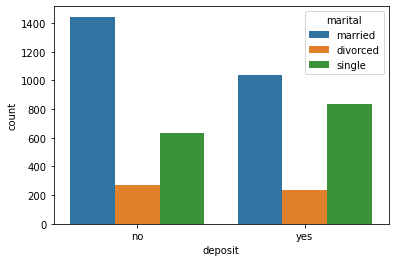

In [90]:
sns.countplot(data=train2,x='deposit',hue='marital')

In [91]:
test[test.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
44,57,technician,married,primary,no,3376,yes,no,telephone,2,jun,421,2,-1,NaN,unknown,yes


In [92]:
test2=test.dropna()
test2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,50,management,married,tertiary,no,0,no,no,cellular,30,jan,199,1,205,1.0,failure,no
1,50,admin.,married,secondary,no,715,no,no,cellular,28,aug,131,13,-1,0.0,unknown,no
2,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0.0,unknown,yes
3,39,technician,married,secondary,no,24,yes,no,cellular,28,jan,79,4,-1,0.0,unknown,no
4,35,blue-collar,married,secondary,no,563,no,yes,cellular,4,jun,147,1,119,3.0,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,32,admin.,single,secondary,no,-32,no,no,cellular,29,jan,320,1,185,5.0,other,no
1113,39,blue-collar,married,secondary,no,11854,yes,no,cellular,15,may,15,9,-1,0.0,unknown,no
1114,54,blue-collar,married,unknown,no,-361,yes,no,unknown,26,may,227,1,-1,0.0,unknown,no
1115,30,self-employed,single,tertiary,no,916,no,no,cellular,29,dec,449,2,-1,0.0,unknown,yes


In [93]:
trainf=pd.get_dummies(train2,drop_first=True)

In [94]:
testf=pd.get_dummies(test2,drop_first=True)

In [95]:
X=trainf.drop('deposit_yes',axis=1)
y=trainf['deposit_yes']

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [97]:
knn=KNeighborsClassifier(n_neighbors=11)

In [98]:
knn.fit(X=X,y=y)

KNeighborsClassifier(n_neighbors=11)

In [99]:
predictions=knn.predict(testf.drop('deposit_yes',axis=1))

In [100]:
accuracy_score(testf['deposit_yes'],predictions)

0.771505376344086

In [115]:
ar=testf['deposit_yes']!=predictions

In [106]:
ar.value_counts()

False    861
True     255
Name: deposit_yes, dtype: int64

In [141]:
print(confusion_matrix(testf['deposit_yes'],predictions))

[[502 104]
 [151 359]]


In [142]:
print(classification_report(testf['deposit_yes'],predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       606
           1       0.78      0.70      0.74       510

    accuracy                           0.77      1116
   macro avg       0.77      0.77      0.77      1116
weighted avg       0.77      0.77      0.77      1116



In [143]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [120]:
confusion_metrics(confusion_matrix(testf['deposit_yes'],predictions))

True Positives: 359
True Negatives: 502
False Positives: 104
False Negatives: 151
--------------------------------------------------
Accuracy: 0.77
Mis-Classification: 0.23
Sensitivity: 0.7
Specificity: 0.83
Precision: 0.83
f_1 Score: 0.76


In [121]:
from sklearn.linear_model import LogisticRegression

In [130]:
log=LogisticRegression(max_iter=9000)
log.fit(X=X,y=y)
logpredictions=log.predict(testf.drop('deposit_yes',axis=1))

In [131]:
logar=testf['deposit_yes']!=logpredictions
logar.value_counts()

False    922
True     194
Name: deposit_yes, dtype: int64

In [132]:
accuracy_score(testf['deposit_yes'],logpredictions)

0.8261648745519713

In [133]:
print(classification_report(testf['deposit_yes'],logpredictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       606
           1       0.82      0.79      0.81       510

    accuracy                           0.83      1116
   macro avg       0.83      0.82      0.82      1116
weighted avg       0.83      0.83      0.83      1116



In [135]:
trainf['deposit_yes'].value_counts()

0    2352
1    2112
Name: deposit_yes, dtype: int64

In [136]:
testf['deposit_yes'].value_counts()

0    606
1    510
Name: deposit_yes, dtype: int64

In [144]:
predictions.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [146]:
print predictions((unique, counts)).

SyntaxError: invalid syntax (<ipython-input-146-9850e7bc0d8e>, line 1)

In [152]:
import numpy as np

unique, counts = np.unique(predictions, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 653]
 [  1 463]]
